In [2]:
import netCDF4 as nc
from h5py import File
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import glob
from geopy.distance import geodesic

In [2]:
halo_files_v1 = sorted(glob.glob('2023*CH4.h5'))
halo_files_v2 = sorted(glob.glob('june_2025_reprocessing/staqs-HALO-XCH4_LARC*'))
halo_files_v2

['june_2025_reprocessing/staqs-HALO-XCH4_LARC-G3_20230726_R1_F1.h5',
 'june_2025_reprocessing/staqs-HALO-XCH4_LARC-G3_20230726_R1_F2.h5',
 'june_2025_reprocessing/staqs-HALO-XCH4_LARC-G3_20230728_R1_F1.h5',
 'june_2025_reprocessing/staqs-HALO-XCH4_LARC-G3_20230728_R1_F2.h5',
 'june_2025_reprocessing/staqs-HALO-XCH4_LARC-G3_20230805_R1_F1.h5',
 'june_2025_reprocessing/staqs-HALO-XCH4_LARC-G3_20230809_R1_F1.h5']

In [3]:
f = File(halo_files_v1[0],'r')
xch4 = f['CH4DataProducts']['XCH4_clear'][:]
good_inds = np.where(1-np.isnan(xch4))
lat = f["Nav_Data"]['gps_lat'][:][good_inds]
lon = f['Nav_Data']['gps_lon'][:][good_inds]
t = f['Nav_Data']['gps_time'][:][good_inds]
alt = f['Nav_Data']['gps_alt'][:][good_inds]

f = File(halo_files_v2[0],'r')
xch4_2 = f['CH4DataProducts']['XCH4_clear'][:]
good_inds = np.where(1-np.isnan(xch4))
lat_2 = f["Nav_Data"]['gps_lat'][:][good_inds]
lon_2 = f['Nav_Data']['gps_lon'][:][good_inds]
t_2 = f['Nav_Data']['gps_time'][:][good_inds]
alt_2 = f['Nav_Data']['gps_alt'][:][good_inds]


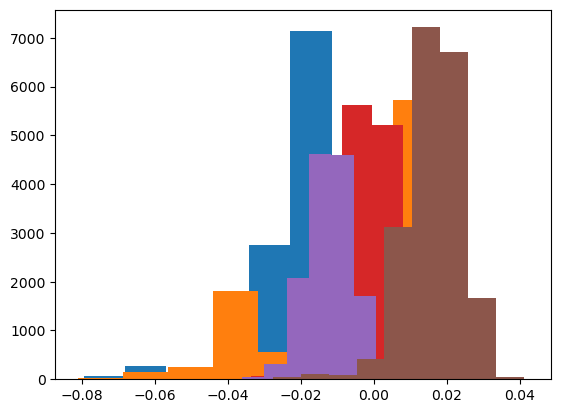

In [5]:
fig,ax = plt.subplots(1)
for i in range(6):
    xch4 = File(halo_files_v1[i])['CH4DataProducts']['XCH4_clear'][:]
    xch4_2 = File(halo_files_v2[i])['CH4DataProducts']['XCH4_clear'][:]
    ax.hist(xch4-xch4_2)
#for i in [4,5]:
#    xch4 = File(halo_files_v1[i])['CH4DataProducts']['XCH4_clear'][:]
#    xch4_2 = File(halo_files_v2[i-1])['CH4DataProducts']['XCH4_clear'][:]
#    ax.hist(xch4-xch4_2)

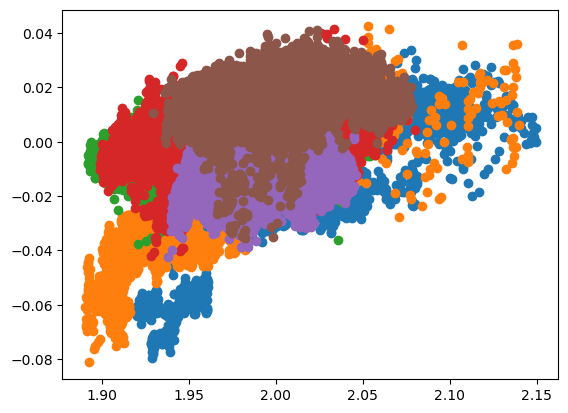

In [6]:
fig,ax = plt.subplots(1)
for i in range(6):
    xch4 = File(halo_files_v1[i])['CH4DataProducts']['XCH4_clear'][:]
    xch4_2 = File(halo_files_v2[i])['CH4DataProducts']['XCH4_clear'][:]
    ax.scatter(xch4,xch4-xch4_2)


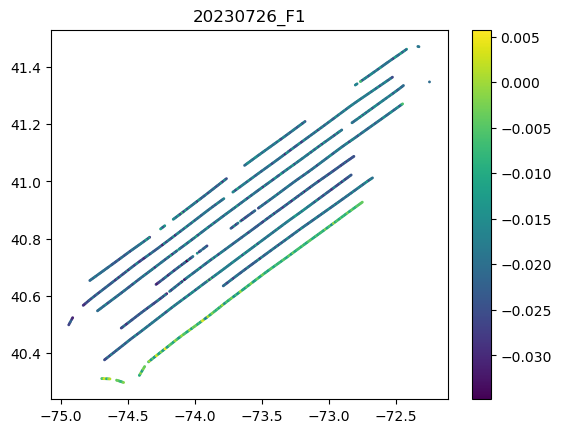

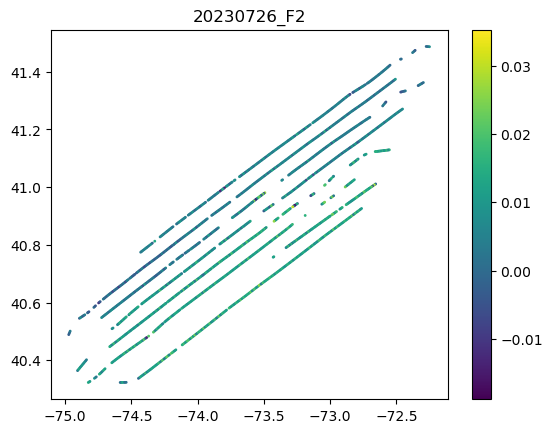

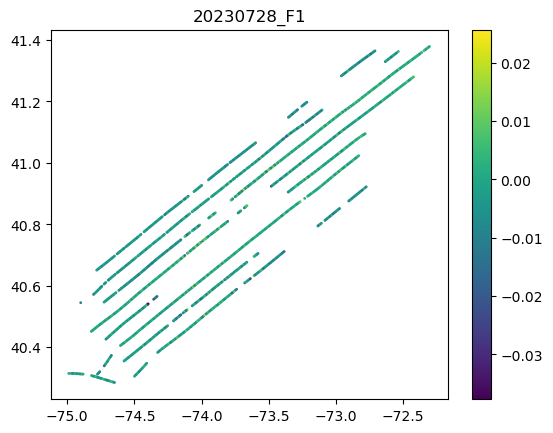

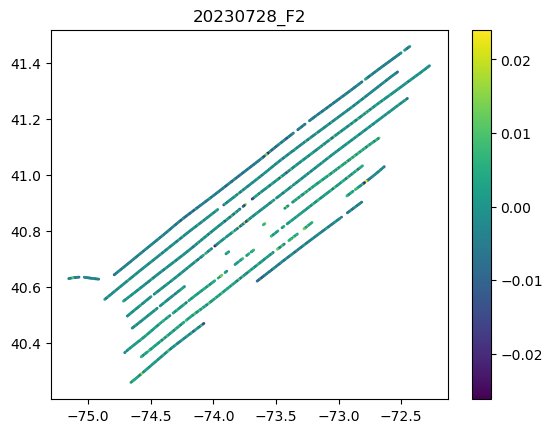

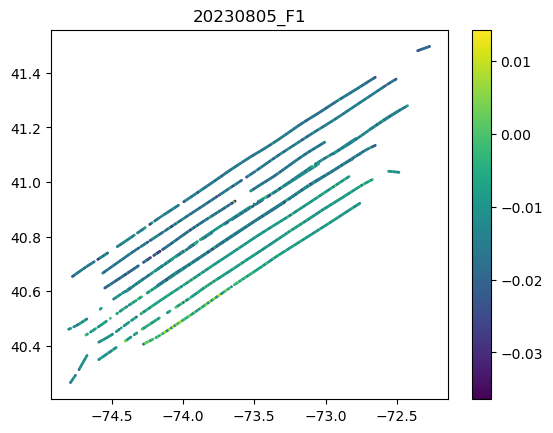

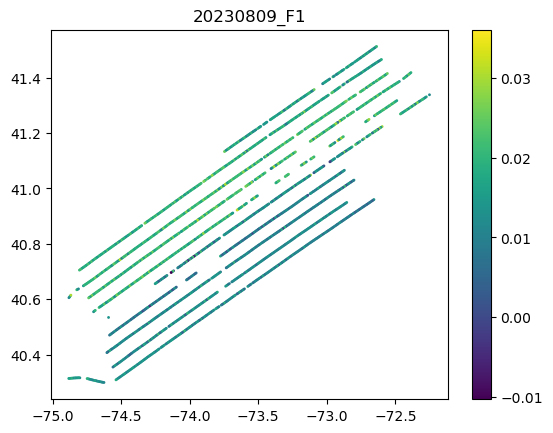

In [6]:
halo_files_v1 = sorted(glob.glob('*_500m.h5'))
halo_files_v2 = sorted(glob.glob('staqs-HALO-XCH4_LARC*500m*'))
halo={}
for i,v1fi,v2fi in zip(range(6),halo_files_v1,halo_files_v2):
    flt = v1fi[:11]
    halo[flt] = {}
    halo[flt]['lat'] = File(v1fi,'r')['lat'][:]
    halo[flt]['lon'] = File(v1fi,'r')['lon'][:]
    halo[flt]['v1'] = File(v1fi,'r')['xch4'][:]
    halo[flt]['v2'] = File(v2fi,'r')['xch4'][:]
    plt.figure(); plt.scatter(halo[flt]['lon'],halo[flt]['lat'],c=halo[flt]['v1']-halo[flt]['v2'],s=1); plt.colorbar(); plt.title(flt);

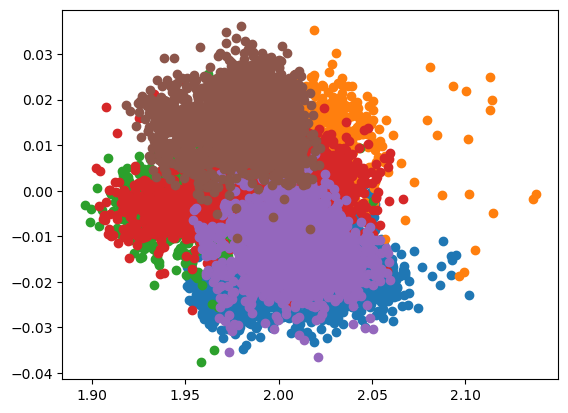

In [11]:
plt.figure()
for flt in sorted(list(halo.keys())):
    plt.scatter(halo[flt]['v2'],halo[flt]['v1']-halo[flt]['v2'])

In [ ]:
plt.figure()
for flt in sorted(list(halo.keys())):
    plt.hist(halo[flt]['v2'],halo[flt]['v1'])